# Data Analysis

## Primeras aproximaciones de análisis

In [96]:
#Instalaciones previas
# !pip install altair vega_datasets

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import altair as alt

# Configuración Jupyter
pd.set_option('display.max_columns', None)
sns.set_style("darkgrid")

# Cargamos el dataframe ya limpio desde el análisis de Features
data_ana_corona = pd.read_csv("data_ana_coronaperiod_withgenre.csv", sep = ',', parse_dates=['release_date_year'])
# data_ana_corona['release_date_year'] = data_ana_corona['release_date_year'].dt.year
data_ana_corona = data_ana_corona.drop(columns=['Unnamed: 0'])

print('Tamaño inicial: ',data_ana_corona.shape)
data_ana_corona.sample(2)

Tamaño inicial:  (1581, 39)


,Track Name,Artist,Streams,date,spotify_id,year,Streamstotal,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,release_date_year,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,genres_together,artist_id,artist_followers,artist_popularity,streamstotal_weights,genre_depurated,genre_depurated_final
118,Medusa,Jhay Cortez,270334,2020-03-13,3qM0vBxIe4VUbK0Z0smuVP,2020,9440534,Medusa,2020-02-05,0.592616,0.79,0.194,0.886,0.604,0.000003,0.107,0.779678,0.267516,0.383,0.237701,4,2020-01-01,latin,reggaeton,trap latino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,trap latino",0EFisYRi20PTADoJrifHrz,1168759,0.828283,0.008426,reggaeton,reggaeton
1325,Bonita,CNCO,31901,2018-04-06,6ziVPV26v172Pijs6LvubI,2018,776291,CNCO,2018-04-06,0.299021,0.55,0.144,0.757,0.709,0.000000,0.354,0.843729,0.074406,0.466,0.210769,4,2018-01-01,boy band,latin,latin pop,reggaeton,tropical,NaN,NaN,NaN,NaN,NaN,"boy band,latin,latin pop,reggaeton,tropical",0eecdvMrqBftK0M1VKhaF4,6801665,0.767677,0.001103,boy band,pop


# Oldies analysis

# Pregunta 3: ¿Se han vuelto a reescuchar más canciones antiguas entre diferentes años?

La idea de esta pregunta es saber si durante el periodo del coronavirus hemos rememorado canciones antiguas, hasta el punto de llegar al top200 y saber si es algo habitual y ocurre en otros años, o no.

Para ello vamos a usar la columna "release_date_year" que nos dice la fecha de lanzamiento de la canción. En un primer vistazo ya vemos que en el 2020 se han reescuchado más canciones antiguas que otros años. Como está un t.anto disperso, vamos a agrupar años marcando para marcar dos rangos de fechas: hasta 2014 y de 2014 a 2020. Ojo, tambié hay que tener en cuenta que los años superiores, tendrán más canciones antiguas porque cogen las de los años anteriores

In [87]:
data_oldies_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   year               8 non-null      object        
 1   release_date_year  8 non-null      datetime64[ns]
 2   Total_songs        8 non-null      int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 320.0+ bytes


In [102]:
# Vamos a crear un dataframe agrupando los datos que nos interesa y vemos cuantas canciones hay de cada Relsease date en cada año
data_oldies_count = data_ana_corona.groupby(['year', 'release_date_year']).count()
data_oldies_count.reset_index(inplace=True)
data_oldies_count = data_oldies_count[['year', 'release_date_year', 'Track Name']]
data_oldies_count.rename(columns={'Track Name': 'Total_songs'}, inplace=True)


# Creamos fechas para agrupar
fecha_1 = datetime(1959,1,1)
fecha_2 = datetime(2014,1,1)
fecha_3 = datetime(2019,1,1)

# data_oldies_count['year'] = pd.to_datetime(data_oldies_count['year'], format='%Y')
data_oldies_count['year'] = data_oldies_count['year'].astype(str)
alt.Chart(data_oldies_count).mark_circle().encode(
    x = alt.X('year(release_date_year):T', title='year', bin=alt.Bin(maxbins=15)),
    y= 'year',
    color='year',
    size = alt.Size('Total_songs', title='Número canciones')
).properties(
    width=800,
    height=150).interactive(
)



alt.Chart(...)

In [160]:
# Ploteamos el rango más antiguo para ver donde están las canciones por año
data_oldies_count_1959_2014 = data_oldies_count[data_oldies_count.release_date_year.between(fecha_1, fecha_2)]
graph_oldies_count_1959_2014 = alt.Chart(data_oldies_count_1959_2014).mark_bar().encode(
    x = 'release_date_year',
    y= 'Total_songs',
    color='year',
).properties(width=800, height=300).interactive()

data_oldies_count_2014_2019 = data_oldies_count[data_oldies_count.release_date_year.between(fecha_2, fecha_3)]
graph_oldies_count_2014_2019 = alt.Chart(data_oldies_count_2014_2019).mark_bar().encode(
    x = 'release_date_year',
    y= 'Total_songs',
    color='year',
).properties(width=800, height=300).interactive()

# Número de canciones anteriores a 2014 agrupadas en años
print(data_oldies_count_1959_2014.groupby('year').sum())
print(data_oldies_count_2014_2020.groupby('year').sum())

graph_oldies_count_1959_2014&graph_oldies_count_2014_2019

      Total_songs
year             
2017            8
2018           14
2019            6
2020           13
      Total_songs
year             
2017          379
2018          389
2019          366
2020          161


alt.VConcatChart(...)

Pero ojo, estamos mirando número de canciones y no Streamstotales de las mismas, que es lo que de verdad nos interesa, hacemos lo mismo con Streams totales y veo que el gráfico coge otro matiz, determinadas canciones antiguas.

Si quieres saber qué canción es deja el ratón sobre la barra

In [162]:
data_oldies_streams = data_ana_corona.groupby(['year', 'release_date_year', 'Track Name']).sum()
data_oldies_streams.reset_index(inplace=True)
data_oldies_streams = data_oldies_streams[['year', 'release_date_year', 'Track Name','Streamstotal']]
data_oldies_streams['year'] = data_oldies_streams['year'].astype(str)

# Ploteamos el rango más antiguo para ver donde están las canciones por año
data_oldies_streams_1959_2014 = data_oldies_streams[data_oldies_streams.release_date_year.between(fecha_1, fecha_2)]
graph_oldies_streams_1959_2014 = alt.Chart(data_oldies_streams_1959_2014).mark_bar().encode(
    x = 'release_date_year',
    y= 'Streamstotal',
    color='year',
    tooltip= 'Track Name',
).properties(width=800, height=300).interactive()

data_oldies_streams_2014_2019 = data_oldies_streams[data_oldies_streams.release_date_year.between(fecha_2, fecha_3)]
graph_oldies_streams_2014_2019 = alt.Chart(data_oldies_streams_2014_2019).mark_bar().encode(
    x = 'release_date_year',
    y= 'Streamstotal',
    color='year',
    size= 'Streamstotal',
    tooltip= 'Track Name',
).properties(width=800, height=300).interactive()

graph_oldies_streams_1959_2014&graph_oldies_streams_2014_2019

alt.VConcatChart(...)

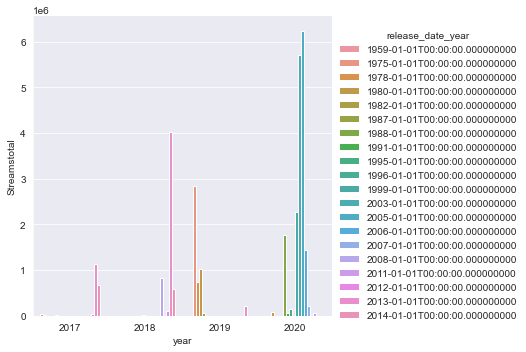

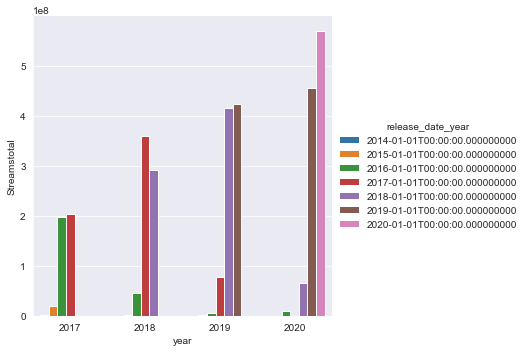

In [102]:
# Hecho con otros gráficos
'''# Vamos a crear un dataframe agrupando los datos que nos interesa y echamos un primer vistazo
data_oldies_streams = data_ana_corona.groupby(['year', 'release_date_year']).sum()
data_oldies_streams.reset_index(inplace=True)
data_oldies_streams = data_oldies_streams[['year', 'release_date_year', 'Streamstotal']]

# Ploteamos los rangos
data_oldies_streams_1959_2014 = data_oldies_streams[data_oldies_streams.release_date_year.between(fecha_1, fecha_2)]
sns.catplot(x='year', y='Streamstotal', hue='release_date_year', data=data_oldies_streams_1959_2014, kind='bar')

data_oldies_streams_2014_2020 = data_oldies_streams[data_oldies_streams.release_date_year.between(fecha_2, fecha_3)]
sns.catplot(x='year', y='Streamstotal', hue='release_date_year', data=data_oldies_streams_2014_2020, kind='bar')'''

In [104]:
data_oldies = data_ana_corona.groupby(['year', 'release_date_year', 'streamstotal_weights']).sum()
data_oldies

Streams  Streamstotal    length  \
year release_date_year streamstotal_weights                                    
2017 1959-01-01        0.000092                20641         38999  0.223938   
     1975-01-01        0.000036                15080         15080  0.718234   
     1987-01-01        0.000046                19621         19621  0.561570   
     2012-01-01        0.000082                17406         34703  0.417325   
     2013-01-01        0.002673                22696       1131383  0.473768   
...                                              ...           ...       ...   
2020 2020-01-01        0.013315               561102      14918019  0.196141   
                       0.013619               406642      15258677  0.227846   
                       0.014153               378009      15856333  0.329911   
                       0.015587               619574      17463083  0.214125   
                       0.017702               244655      19832873  0.566571   

                                             popularity  acousticness  \
year release_date_year streamstotal_weights                             
2017 1959-01-01        0.000092                    0.00        0.7380   
     1975-01-01        0.000036                    0.02        0.2710   
     1987-01-01        0.000046                    0.00        0.0124   
     2012-01-01        0.000082                    0.67        0.3370   
     2013-01-01        0.002673                    0.68        0.6070   
...                                                 ...           ...   
2020 2020-01-01        0.013315                    0.84        0.1930   
                       0.013619                    0.85        0.0861   
                       0.014153                    0.85        0.0217   
                       0.015587                    0.85        0.0130   
                       0.017702                    0.89        0.0103   

                                             danceability  energy  \
year release_date_year streamstotal_weights                         
2017 1959-01-01        0.000092                     0.516   0.798   
     1975-01-01        0.000036                     0.414   0.404   
     1987-01-01        0.000046                     0.359   0.543   
     2012-01-01        0.000082                     0.721   0.834   
     2013-01-01        0.002673                     0.614   0.379   
...                                                   ...     ...   
2020 2020-01-01        0.013315                     0.663   0.598   
                       0.013619                     0.685   0.848   
                       0.014153                     0.755   0.617   
                       0.015587                     0.641   0.857   
                       0.017702                     0.607   0.829   

                                             instrumentalness  liveness  \
year release_date_year streamstotal_weights                               
2017 1959-01-01        0.000092                      0.000128    0.3050   
     1975-01-01        0.000036                      0.000000    0.3000   
     1987-01-01        0.000046                      0.006810    0.2860   
     2012-01-01        0.000082                      0.000000    0.1040   
     2013-01-01        0.002673                      0.000464    0.0986   
...                                                       ...       ...   
2020 2020-01-01        0.013315                      0.000080    0.0856   
                       0.013619                      0.000007    0.0783   
                       0.014153                      0.000000    0.0625   
                       0.015587                      0.005340    0.0695   
                       0.017702                      0.000000    0.1070   

                                             loudness  speechiness  valence  \
year release_date_year streamstotal_weights                                   
2017 1959-01-01       

Hacemos un gráfico para ver canciones lanzadas en el rango 1 y se ve claramente que en el 2020 ha habido muchas más reproducciones de canciones anteriores al 2014 que los años anteriores. Aquí si podemos establecer una conclusión más clara: en la pandemia escuhamos más a los oldies, ¿por qué?

In [176]:
# Para agrupar los años antiguos y sumar sus StreamsTotales

# Creamos fechas para agrupar
fecha_1 = datetime(1959, 1, 1)
fecha_2 = datetime(2014, 1, 1)

data_oldies = data_ana_corona.groupby(['year', 'release_date_year']).sum()
data_oldies.reset_index(inplace=True)
data_oldies = data_oldies[['year', 'release_date_year', 'Streamstotal', 'streamstotal_weights']]

data_oldies_2017 = data_oldies[data_oldies['year'] == 2017]
data_oldies_2018 = data_oldies[data_oldies['year'] == 2018]
data_oldies_2019 = data_oldies[data_oldies['year'] == 2019]
data_oldies_2020 = data_oldies[data_oldies['year'] == 2020]

data_oldies_2017_rango1_totalStreams = data_oldies_2017[data_oldies_2017.release_date_year.between(fecha_1, fecha_2)].sum()['Streamstotal']
data_oldies_2018_rango1_totalStreams = data_oldies_2018[data_oldies_2018.release_date_year.between(fecha_1, fecha_2)].sum()['Streamstotal']
data_oldies_2019_rango1_totalStreams = data_oldies_2019[data_oldies_2019.release_date_year.between(fecha_1, fecha_2)].sum()['Streamstotal']
data_oldies_2020_rango1_totalStreams = data_oldies_2020[data_oldies_2020.release_date_year.between(fecha_1, fecha_2)].sum()['Streamstotal']

# Create dataframe
columns = ['Streamstotal']
index = ['2017', '2018', '2019', '2020']
data = [data_oldies_2017_rango1_totalStreams,
        data_oldies_2018_rango1_totalStreams,
        data_oldies_2019_rango1_totalStreams,
        data_oldies_2020_rango1_totalStreams]
data_oldies_rango1 = pd.DataFrame(data, index=index, columns=columns)

#Gráfico
graph_oldies_rango1 = alt.Chart(data_oldies_rango1.reset_index()).mark_bar().encode(
    x = 'index',
    y = 'Streamstotal',
    color= 'index'
).properties(width=500, height=200).interactive()
graph_oldies_rango1

alt.Chart(...)

Por que no me quiero quedar con dudas con el gráfico anterior, quiero ver esta misam comparación pero en otro periodo que ya tenemos preparado anteriormente. Aplicamos el código todo junto y vemos la diferencia, y es interesante ver que el total de streams es mucho mayor, ¿por qué?, ¿Puede estar relacionado con que este periodo de normalidad coge el rango de las navidades donde se hacen muchos karaokes donde evidentemente se esuchan éxitos antiguos? Pero tengo mis dudas porque el periodo normal coge del 8 de Enero al 8 de Marzo

In [184]:
# Cargamos el dataframe ya limpio desde el análisis de Features
data_ana_normal = pd.read_csv("data_ana_normalperiod.csv", sep = ',', parse_dates=['release_date_year'])
data_ana_normal = data_ana_normal.drop(columns=['Unnamed: 0'])

# Creamos fechas para agrupar
fecha_1 = datetime(1959, 1, 1)
fecha_2 = datetime(2014, 1, 1)
fecha_3 = datetime(2020, 1, 1)

data_oldies = data_ana_normal.groupby(['year', 'release_date_year']).sum()
data_oldies.reset_index(inplace=True)
data_oldies = data_oldies[['year', 'release_date_year', 'Streamstotal', 'streamstotal_weights']]

data_oldies_2017 = data_oldies[data_oldies['year'] == 2017]
data_oldies_2018 = data_oldies[data_oldies['year'] == 2018]
data_oldies_2019 = data_oldies[data_oldies['year'] == 2019]
data_oldies_2020 = data_oldies[data_oldies['year'] == 2020]

data_oldies_2017_rango1_totalStreams = data_oldies_2017[data_oldies_2017.release_date_year.between(fecha_1, fecha_2)].sum()['Streamstotal']
data_oldies_2018_rango1_totalStreams = data_oldies_2018[data_oldies_2018.release_date_year.between(fecha_1, fecha_2)].sum()['Streamstotal']
data_oldies_2019_rango1_totalStreams = data_oldies_2019[data_oldies_2019.release_date_year.between(fecha_1, fecha_2)].sum()['Streamstotal']
data_oldies_2020_rango1_totalStreams = data_oldies_2020[data_oldies_2020.release_date_year.between(fecha_1, fecha_2)].sum()['Streamstotal']

# Create dataframe
columns = ['Streamstotal']
index = ['2017', '2018', '2019', '2020']
data = [data_oldies_2017_rango1_totalStreams,
        data_oldies_2018_rango1_totalStreams,
        data_oldies_2019_rango1_totalStreams,
        data_oldies_2020_rango1_totalStreams]
data_oldies_rango1 = pd.DataFrame(data, index=index, columns=columns)


#Gráfico
graph_oldies_rango1_normal = alt.Chart(data_oldies_rango1.reset_index()).mark_bar().encode(
    x = 'index',
    y = 'Streamstotal',
    color= 'index'
).properties(width=500, height=200).interactive()
graph_oldies_rango1_normal


alt.Chart(...)

Si volvemos al análisis del periodo pandemia y hacemos lo mismo con canciones posteriores al 2014, vemos otro panorama, con una tendencia pero claramente está influenciada por el hecho de que años más actuales congregan los años anteriores próximos.

In [185]:
# Para agrupar los años antiguos y sumar sus StreamsTotales

# Creamos fechas para agrupar
fecha_2 = datetime(2014, 1, 1)
fecha_3 = datetime(2020, 1, 1)

data_oldies = data_ana_corona.groupby(['year', 'release_date_year']).sum()
data_oldies.reset_index(inplace=True)
data_oldies = data_oldies[['year', 'release_date_year', 'Streamstotal', 'streamstotal_weights']]

data_oldies_2017 = data_oldies[data_oldies['year'] == 2017]
data_oldies_2018 = data_oldies[data_oldies['year'] == 2018]
data_oldies_2019 = data_oldies[data_oldies['year'] == 2019]
data_oldies_2020 = data_oldies[data_oldies['year'] == 2020]

data_oldies_2017_rango1_totalStreams = data_oldies_2017[data_oldies_2017.release_date_year.between(fecha_2, fecha_3)].sum()['Streamstotal']
data_oldies_2018_rango1_totalStreams = data_oldies_2018[data_oldies_2018.release_date_year.between(fecha_2, fecha_3)].sum()['Streamstotal']
data_oldies_2019_rango1_totalStreams = data_oldies_2019[data_oldies_2019.release_date_year.between(fecha_2, fecha_3)].sum()['Streamstotal']
data_oldies_2020_rango1_totalStreams = data_oldies_2020[data_oldies_2020.release_date_year.between(fecha_2, fecha_3)].sum()['Streamstotal']

# Create dataframe
columns = ['Streamstotal']
index = ['2017', '2018', '2019', '2020']
data = [data_oldies_2017_rango1_totalStreams,
        data_oldies_2018_rango1_totalStreams,
        data_oldies_2019_rango1_totalStreams,
        data_oldies_2020_rango1_totalStreams]
data_oldies_rango2 = pd.DataFrame(data, index=index, columns=columns)

#Gráfico
data_oldies_rango2 = alt.Chart(data_oldies_rango2.reset_index()).mark_bar().encode(
    x = 'index',
    y = 'Streamstotal',
    color= 'index'
).properties(width=500, height=200).interactive()
data_oldies_rango2


alt.Chart(...)

## Extra

 Para matar nuestra curiosidad, vamos cuales son las canciones antiguas más escuchadas en cada año. En los gráficos el Artista está en colot y en la etiqueta el nombre de la canción

En 2017, batiburrillo, pero el primero está EdSheran que sacó nuevo disco el 3 de marzo de 2017, lo que es lógico que se vuelva a escuchar alguna canción que otra antigua suya.

In [230]:
data_oldies_songs = data_ana_corona[data_ana_corona.release_date_year.between(fecha_1, fecha_2)]
data_oldies_songs_2017 = data_oldies_songs[data_oldies_songs['year'] == 2017]
data_oldies_songs_2017.sort_values(by=['Streamstotal'], ascending=False)


# Ploteamos el rango más antiguo para ver donde están las canciones por año
graph_oldies_songs_2017 = alt.Chart(data_oldies_songs_2017).mark_circle(
size=100,
).encode(
    x = 'Streamstotal',
    y= 'release_date_year',
    color= 'Artist',
    tooltip= 'Track Name',
).properties(width=700, height=200).interactive()

graph_oldies_songs_2017


alt.Chart(...)

En 2018, hay muchas canciones de Avicii, que tiene lógica porque se suicidó el 20 de abril de 2018

In [225]:
data_oldies_songs = data_ana_corona[data_ana_corona.release_date_year.between(fecha_1, fecha_2)]
data_oldies_songs_2018 = data_oldies_songs[data_oldies_songs['year'] == 2018]
data_oldies_songs_2018.sort_values(by=['Streamstotal'], ascending=False)


# GRáfico
graph_oldies_songs_2018 = alt.Chart(data_oldies_songs_2018).mark_circle(
size=100,
).encode(
    x = 'Streamstotal',
    y= 'release_date_year',
    color= 'Artist',
    tooltip= 'Track Name',
).properties(width=700, height=200).interactive()

graph_oldies_songs_2018

alt.Chart(...)

En 2019 vemos que Queen lo petó, muy lógicamente porque el 31 de octubre se estrenó la película Bohemian Rhapsody que tuvo mucho éxito

In [231]:
data_oldies_songs = data_ana_corona[data_ana_corona.release_date_year.between(fecha_1, fecha_2)]
data_oldies_songs_2019 = data_oldies_songs[data_oldies_songs['year'] == 2019]
data_oldies_songs_2019.sort_values(by=['Streamstotal'], ascending=False)

# Gráfico
graph_oldies_songs_2019 = alt.Chart(data_oldies_songs_2019).mark_circle(
size=100,
).encode(
    x = 'Streamstotal',
    y= 'release_date_year',
    color= 'Artist',
    tooltip= 'Track Name',
).properties(width=700, height=200).interactive()

graph_oldies_songs_2019


alt.Chart(...)

Por último en 2020 vemos que es donde más variedad de reescucha que hubo y además de muchos clásicos y en español, entre ellos, claro está, El Resitiré y que ya analicé en uan publicación en mi blog.

¿Quiere decir esto que en momentos de crisis escuchamos canciones que nos lleven a momentos antereiores? ¿o canciones que nos gusta cantar?, ¿o canciones que ya conocemos de sobra?

Por supuesto el 20 abril de Celtas Cortos estña presente, pero ojo, porque en años anteriores no lo estuvo. Está claro que los tiempos de crisis, y tal vez encerrados en casa potencia la escucha de antiguos éxitos.

In [232]:
data_oldies_songs = data_ana_corona[data_ana_corona.release_date_year.between(fecha_1, fecha_2)]
data_oldies_songs_2020 = data_oldies_songs[data_oldies_songs['year'] == 2020]
data_oldies_songs_2020.sort_values(by=['Streamstotal'], ascending=False)
# data_oldies_songs.groupby(['year','release_date_year', 'Track Name','Streamstotal']).sum()

# Gráfico
graph_oldies_songs_2020 = alt.Chart(data_oldies_songs_2020).mark_circle(
size=100,
).encode(
    x = 'Streamstotal',
    y= 'release_date_year',
    color= 'Artist',
    tooltip= 'Track Name',
).properties(width=700, height=200).interactive()

graph_oldies_songs_2020


alt.Chart(...)

Para terminar, ¿cuáles son los éxitos clásicos reescuchados en periodo normalizado? Sorpresa! 3 de las canciones antiguas más escuchadas se mantienen, es decir, antes de la pandemia ya se escuchaban. Interesante ante todo. No queda claro hasta que punto un estado de crisis influye en la escucha de los exitosos clásicos.

In [235]:
data_oldies_songs_normal = data_ana_normal[data_ana_normal.release_date_year.between(fecha_1, fecha_2)]
data_oldies_songs_normal_2017= data_oldies_songs_normal[data_oldies_songs_normal['year'] == 2020]
data_oldies_songs_normal_2017.sort_values(by=['Streamstotal'], ascending=False)

# Gráfico
graph_oldies_songs_normal_2017 = alt.Chart(data_oldies_songs_normal_2017).mark_circle(
size=100,
).encode(
    x = 'Streamstotal',
    y= 'release_date_year',
    color= 'Artist',
    tooltip= 'Track Name',
).properties(width=700, height=200).interactive()

graph_oldies_songs_normal_2017

alt.Chart(...)

In [ ]:
 Esta es una prueba que al final los clásicos españoles permanecen

In [252]:
data_oldies_songs = data_ana_corona[data_ana_corona.release_date_year.between(fecha_1, fecha_2)]

# ANÁLISIS POR GENRE
graph_oldies_songs = alt.Chart(data_oldies_songs).mark_bar(

).encode(
    x = 'genre_depurated_final',
    y= 'Streamstotal',
    color= 'genre_depurated_final',
    tooltip= 'year',
).properties(width=300, height=500).interactive()

graph_oldies_songs

alt.Chart(...)